# Data information



The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.


## Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.





# Motivation

In the U.S. approximately 9% of total retail sales comes from an e-commerce website. In fact, companies like Amazon have created retail empires off being such a huge e-commerce website. With e-commerce becoming more and more prevalent in today’s economy it is important for businesses within this sector to understand what factors into a site visitor making a purchase, and being able to put their attention on potential customers. We thought it would be interesting to look into if it’s possible to predict the buying behavior of a site visitor as this can have many implications such as E-commerce website able to better target ads or figure out factors that may lead to increased sales.

## Data Characteristics and Initial Exploration
The data used in this analysis is an Online Shoppers Purchasing Intention data set provided on the UC Irvine’s Machine Learning Repository. The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website. The variables in the data set can be split into these three categories: data related to the page that the user lands on, Google Analytics metrics, and user visit data. 

Upon initially exploring the data, the first thing I noticed was the imbalance in the labels. In this data set 85% of the site visitors did not end up making a purchase, the assumption was that majority of people window shop and did usually do not want to commit to a purchase.

# Settings

In [92]:
# first we need to import our numerical package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import datetime
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Import Data

In [93]:
## Read the .xlsx file with the pandas read_csv method
df = pd.read_csv('online_shoppers_intention.csv')

In [94]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# EDA
Purpose: To gain a clear understanding of your data 
 What are the dimensions? 
 What columns are of interest? 
 Missing data? 
 Outliers? 
 Patterns? 
 Need to reformat? 
 Data types
 We need to understand the relationship in the dataset.



## Overview

In [95]:
display(df.head(5))
print(df.shape)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


(12330, 18)


In [96]:
list(df)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [97]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [98]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [99]:
# convert boolean to float 
df['Weekend']=df['Weekend'].astype(float)
df['Revenue']=df['Revenue'].astype(float)

In [100]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                    float64
Revenue                    float64
dtype: object

In [101]:
df.isnull().sum() # we do not have null values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [102]:
d = {'Jan': 1,
 'Feb':2,
 'Mar':3,
 'Apr':4,
 'May':5,
 'Jun':6,
 'Jul':7,
 'Aug':8,
 'Sep':9,
 'Oct':10,
 'Nov':11,
 'Dec':12}

In [103]:
# converting months to integer values defined in d dictionary
df.Month = df.Month.map(d)

In [104]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                      float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                    float64
Revenue                    float64
dtype: object

In [105]:
df.describe()#statistical summary about the dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12042.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.691496,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.423429,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,8.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


In [106]:
df['counts'] = 1
df[['counts', 'Revenue']].groupby(['Revenue']).agg('count')

,counts
Revenue,
0.0,10422
1.0,1908


In [107]:
df[['counts', 'Month','Revenue']].groupby(['Month','Revenue']).agg('count')

counts
Month Revenue        
2.0   0.0         181
      1.0           3
3.0   0.0        1715
      1.0         192
5.0   0.0        2999
      1.0         365
7.0   0.0         366
      1.0          66
8.0   0.0         357
      1.0          76
9.0   0.0         362
      1.0          86
10.0  0.0         434
      1.0         115
11.0  0.0        2238
      1.0         760
12.0  0.0        1511
      1.0         216

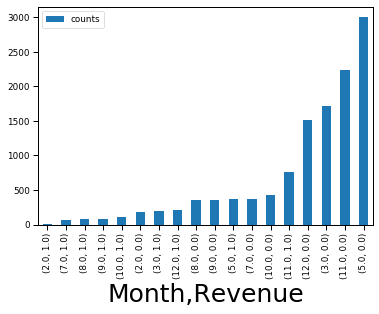

In [108]:
%matplotlib inline
df.loc[:, ['counts', 'Month','Revenue']].groupby(['Month','Revenue']).agg('count').sort_values('counts').plot.bar()

-Maximum of shopping occurs at month 11 ( November)

In [109]:
df = pd.get_dummies(df, columns=['VisitorType'])

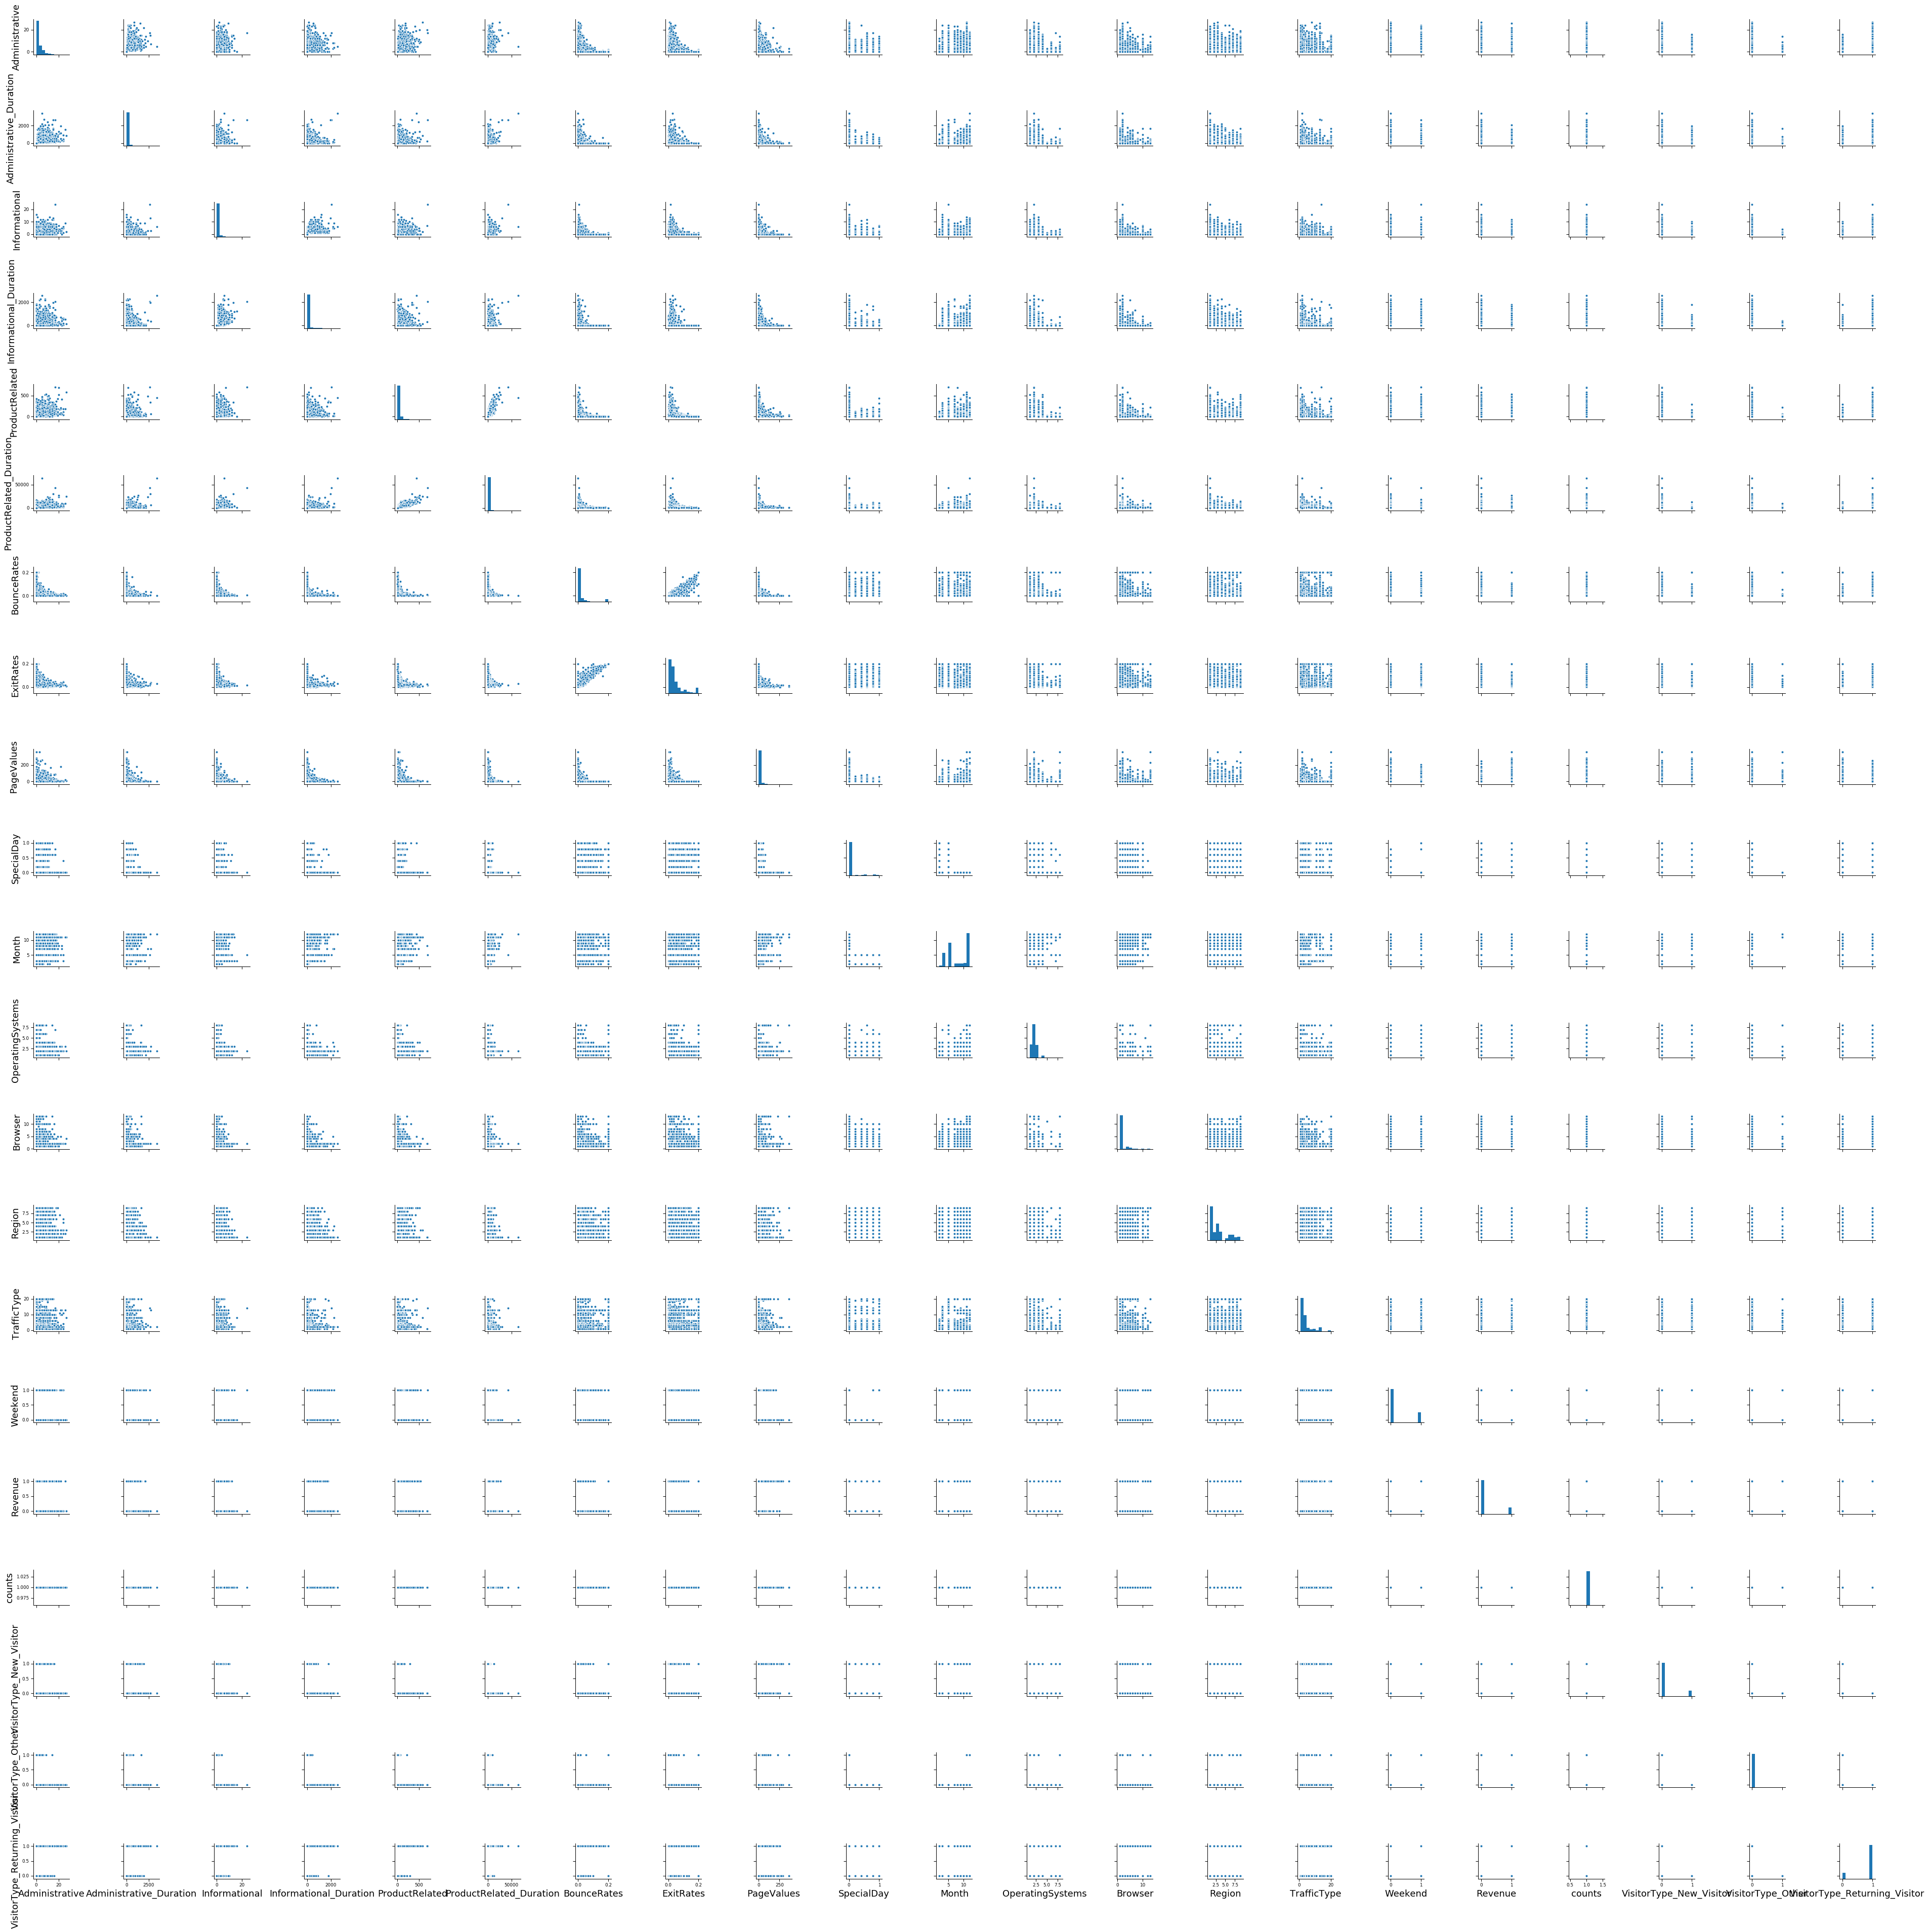

In [117]:
sns.pairplot(df)
sns.set_context("paper", rc={"axes.labelsize":19})

In [114]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,counts,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,...,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917,NaN,0.028449,-0.021184,-0.022884
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,...,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587,NaN,0.025043,-0.008542,-0.022525
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,...,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200,NaN,-0.053429,-0.021457,0.057399
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,...,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345,NaN,-0.043200,-0.013489,0.045501
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,...,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538,NaN,-0.122727,-0.036083,0.128738
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,...,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373,NaN,-0.116447,-0.027183,0.120489
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,...,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673,NaN,-0.139351,0.028112,0.129908
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,...,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071,NaN,-0.183898,0.034763,0.171987
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,...,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569,NaN,0.104952,0.055204,-0.115825
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,...,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305,NaN,-0.082740,-0.025730,0.087123
